In [84]:
import numpy as np
import matplotlib.pyplot as plt
from random import seed, randint
from math import floor, pow, log, exp

In [85]:
class TuningAIMD:
    def __init__(self, initial_cwnd=None, num_users=2, capacity=10):
        # Create a list of lists to store cwnd values for each flow
        # User may provide a list (with length: num_users) containing initial cwnd values, otherwise random values for initial cwnd are generated
        
        # Assign initial cwnd values provided by the user
        if initial_cwnd and len(initial_cwnd)==num_users:
            self.cwnd = [[initial_cwnd[i]] for i in range(num_users)]
        # Exit if initial cwnd list length does not correspond with the number of users
        elif initial_cwnd and len(initial_cwnd)!=num_users:
            print('Size of initial cwnd list provided does not correspond with number of users!')
            return -1
        # Generate random values for each user's initial cwnd
        else:
            # seed(1)
            self.cwnd = [[randint(1, capacity)] for i in range(num_users)]

        print(f'Initial flow allocations: {[flow[-1] for flow in self.cwnd]}')
        
        self.num_users = num_users
        self.capacity = capacity

    def plot_simulation(self):
        # only when num_users=2, we plot each user's allocation on each axis (x-axis, y-axies)
        if (self.num_users == 2):
            plt.figure(figsize = (8, 8))

            plt.plot(self.cwnd[0], self.cwnd[1], '-o', label='AIMD Iterates')
            plt.xlabel('User 1\'s Allocation, X1')
            plt.ylabel('User 2\'s Allocation, X2')
            plt.title('AIMD Algorithm Simulation')

            plt.plot([0,self.capacity], [0,self.capacity], '--', label='Fairness Line')
            plt.plot([0,self.capacity], [self.capacity,0],'-', label='Efficiency Line')

            plt.grid()
            plt.legend()
            plt.show()
        
        # Plotting of flows' cwnd against RTT
        plt.figure(figsize = (8, 8))        
        for flow in range(self.num_users):
            plt.plot(self.cwnd[flow], '-o', label=f'Flow {flow+1}')
        plt.xlabel('RTT')
        plt.ylabel('cwnd')

        plt.grid()
        plt.legend()
        plt.show()

    # def performance_report():
    #     # Does flows converge?
    #     relative_difference = abs(x1 - x2) / max(x1, x2)
        

    def run_simulation(self, alpha=1, beta=0.5, max_iteration=100, 
                       alpha_setting='constant', alpha_slope=1, alpha_exponent=1/3, alpha_sigmoid_scale=0.05, alpha_sigmoid_shift=5,
                       beta_setting='constant', beta_inv_sigmoid_min=0.1, beta_inv_sigmoid_slope=0.1, beta_inv_sigmoid_midpt=10):
        # Run for max_iterations
        for i in range(max_iteration):
            # Check if user's total allocation is within capacity
            if sum(self.cwnd[flow][-1] for flow in range(self.num_users)) <= self.capacity:
                # Proceed with Additive Increase
                for flow in self.cwnd:
                    new_flow_value = flow[-1] + alpha_value(alpha, i, flow[-1], alpha_setting, alpha_slope, alpha_exponent, alpha_sigmoid_scale, alpha_sigmoid_shift)
                    flow.append(new_flow_value)
                print(f'Interation {i}: Additive Increase. New flow allocations: {[flow[-1] for flow in self.cwnd]}')
            
            # Otherwise, if user's total allocations exceeds capacity of the link
            else:
                # Proceed with Multiplicative Decrease
                for flow in self.cwnd:
                    new_flow_value = floor(flow[-1] * beta_value(beta, i, flow[-1], beta_setting, beta_inv_sigmoid_min, beta_inv_sigmoid_slope, beta_inv_sigmoid_midpt))
                    flow.append(new_flow_value)
                print(f'Interation {i}: Multiplicative Decrease. New flow allocations: {[flow[-1] for flow in self.cwnd]}')
        
        # Displaying the final values 
        print('==== Final Values ====')
        for flow in range(len(self.cwnd)):
            print(f'User {flow+1}: {self.cwnd[flow][-1]}')

        # # Performance
        # self.performance_report()    
        
        # Plot
        self.plot_simulation()

def alpha_value(alpha_initial, iteration, prev_cwnd, setting='constant', slope=1, exponent=1/3, sigmoid_scale=0.05,sigmoid_shift=5):
    
    # ==== Linear increase ====
    # Constant increase (simplest case)
    if setting == 'constant':
        return alpha_initial
    
    # Logarithmic funcion of window size
    if setting == 'log-incr':
        return floor(alpha_initial*log(prev_cwnd + 1))
    
    # Exponential increase
    if setting == 'exponent-incr':
        return floor(alpha_initial*pow(prev_cwnd,exponent))
    
    # ==== Non-Linear increase ====
    # Sigmoidal increase with multiplicative factor
    if setting == 'sigmoid-incr':
        return floor(alpha_initial*(1 + np.exp(-sigmoid_scale * (prev_cwnd - sigmoid_shift))))

    # Increasing with Time t (ie iteration)
    if setting == 'incr-with-time':
        return floor(alpha_initial + slope*iteration)

def beta_value(beta_initial, iteration, prev_cwnd, setting='constant', inv_sigmoid_min=0.1, inv_sigmoid_slope=0.1, inv_sigmoid_midpt=10):

    # Constant multiplicative decrease(simplest case)
    if setting == 'constant':
        return beta_initial
    
    # Window size dependent decrease
    if setting == 'cwnd-decr':
        return beta_initial/prev_cwnd

    # Inverse Sigmoidal decrease
    if setting == 'inv-sigmoid-decr':
        return (1 - inv_sigmoid_min) / (1 + exp(-inv_sigmoid_slope * (iteration - inv_sigmoid_midpt)))


# Experiments

## When there are 2 Users

Initial flow allocations: [3, 10]
Interation 0: Multiplicative Decrease. New flow allocations: [1, 5]
Interation 1: Additive Increase. New flow allocations: [2, 6]
Interation 2: Additive Increase. New flow allocations: [3, 7]
Interation 3: Additive Increase. New flow allocations: [4, 8]
Interation 4: Multiplicative Decrease. New flow allocations: [2, 4]
Interation 5: Additive Increase. New flow allocations: [3, 5]
Interation 6: Additive Increase. New flow allocations: [4, 6]
Interation 7: Additive Increase. New flow allocations: [5, 7]
Interation 8: Multiplicative Decrease. New flow allocations: [2, 3]
Interation 9: Additive Increase. New flow allocations: [3, 4]
Interation 10: Additive Increase. New flow allocations: [4, 5]
Interation 11: Additive Increase. New flow allocations: [5, 6]
Interation 12: Multiplicative Decrease. New flow allocations: [2, 3]
Interation 13: Additive Increase. New flow allocations: [3, 4]
Interation 14: Additive Increase. New flow allocations: [4, 5]
Interat

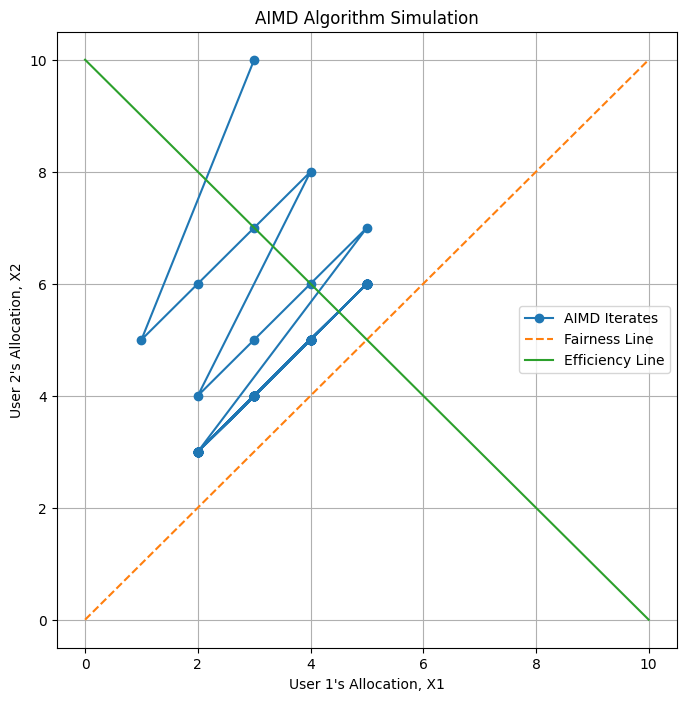

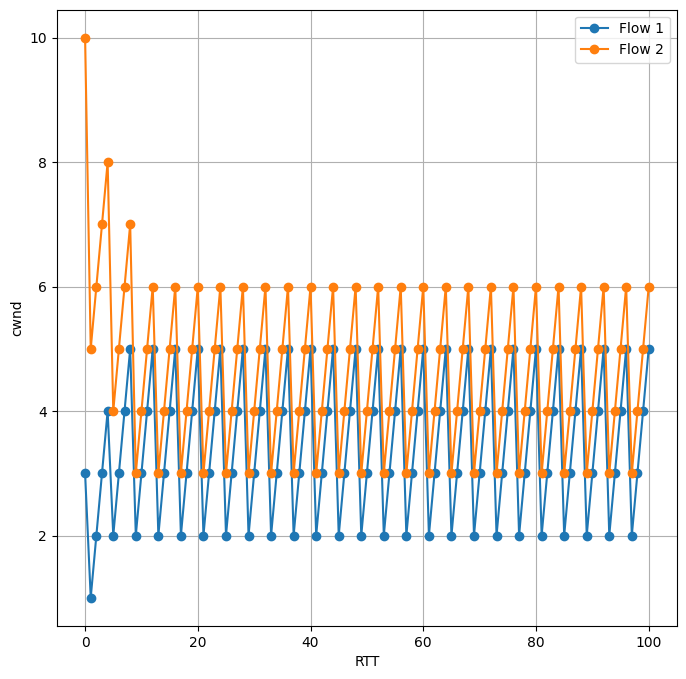

In [92]:
# Fixed beta at beta=0.5
# Constant Alpha Increase

seed(1)
e1 = TuningAIMD(num_users=2)
e1.run_simulation(alpha=1, beta=0.5, alpha_setting='constant', max_iteration=100)

Initial flow allocations: [2]
Interation 0: Additive Increase. New flow allocations: [3]
Interation 1: Additive Increase. New flow allocations: [4]
Interation 2: Additive Increase. New flow allocations: [5]
Interation 3: Additive Increase. New flow allocations: [6]
Interation 4: Additive Increase. New flow allocations: [7]
Interation 5: Additive Increase. New flow allocations: [8]
Interation 6: Additive Increase. New flow allocations: [9]
Interation 7: Additive Increase. New flow allocations: [10]
Interation 8: Additive Increase. New flow allocations: [11]
Interation 9: Multiplicative Decrease. New flow allocations: [5]
Interation 10: Additive Increase. New flow allocations: [6]
Interation 11: Additive Increase. New flow allocations: [7]
Interation 12: Additive Increase. New flow allocations: [8]
Interation 13: Additive Increase. New flow allocations: [9]
Interation 14: Additive Increase. New flow allocations: [10]
Interation 15: Additive Increase. New flow allocations: [11]
Interation

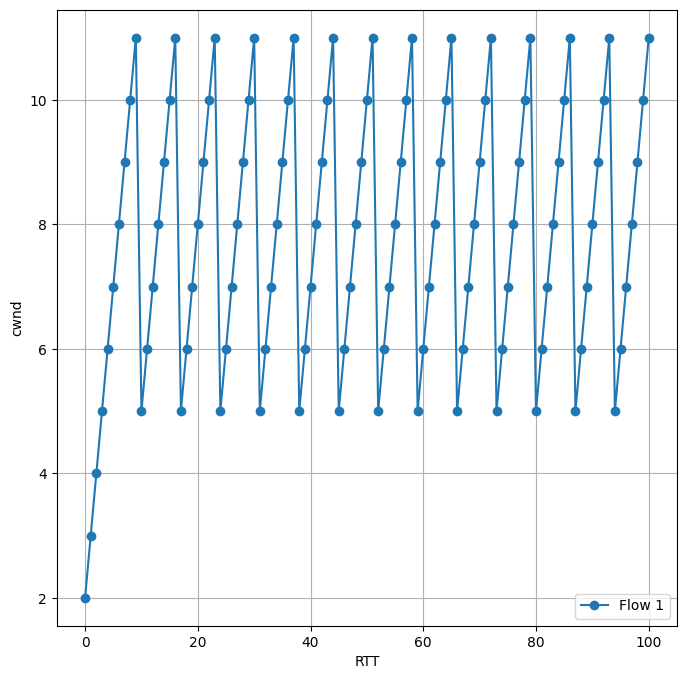

In [32]:
e2 = TuningAIMD(num_users=1)
e2.run_simulation()

Rough Work